In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import analyze_cells_energy as ace
import re
import utils
import itertools
import seaborn as sns
import utils_PLS as upls

In [2]:
# load query file where we added volumes for each area
volumes = ace.clean_volumes_database()

In [3]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'WILD_without_father2500'
batch='WILD_without_father2500'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_without_father2500.npy', 
                                   allow_pickle=True).item()

In [4]:
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, volumes=volumes)

In [5]:
# remove unclean data
dict_results_across_mice.pop('W12Fam')

,area,n_cells,energy,density,relative_density,acronym
0,Frontal pole cerebral cortex,0,0.000000,0.000000,0.000000,FRP
1,Primary motor area,1,1045.671231,0.168902,0.365924,MOp
2,Secondary motor area,0,0.000000,0.000000,0.000000,MOs
3,Primary somatosensory area,2,1024.770216,0.159796,0.346196,SSp
4,Supplemental somatosensory area,1,3194.839513,0.211930,0.459144,SSs
...,...,...,...,...,...,...
194,Interfascicular nucleus raphe,0,0.000000,0.000000,0.000000,IF
195,Interpeduncular nucleus,0,0.000000,0.000000,0.000000,IPN
196,Rostral linear nucleus raphe,0,0.000000,0.000000,0.000000,RL
197,Central linear nucleus raphe,0,0.000000,0.000000,0.000000,CLI


In [6]:
# remove unclean data
dict_results_across_mice.pop('W6Unfam')

,area,n_cells,energy,density,relative_density,acronym
0,Frontal pole cerebral cortex,9,183772.122531,16.497916,0.469303,FRP
1,Primary motor area,63,84796.488249,10.640815,0.302691,MOp
2,Secondary motor area,54,51596.187667,7.897040,0.224641,MOs
3,Primary somatosensory area,101,61903.519564,8.069686,0.229552,SSp
4,Supplemental somatosensory area,54,79995.602460,11.444201,0.325544,SSs
...,...,...,...,...,...,...
194,Interfascicular nucleus raphe,1,53960.268980,9.855757,0.280359,IF
195,Interpeduncular nucleus,1,14039.525692,2.598950,0.073930,IPN
196,Rostral linear nucleus raphe,0,0.000000,0.000000,0.000000,RL
197,Central linear nucleus raphe,4,793461.178211,42.067209,1.196652,CLI


# Format data for task PLS

In [7]:
data_ncells = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                   batch=batch, table='n_cells')
data_energy = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                   batch=batch, table='energy')
data_density = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                    batch=batch, table='density')
data_relative_density = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                             batch=batch, table='relative_density')
data_ncells.dropna(inplace=True, axis=1)
data_energy.dropna(inplace=True, axis=1)
data_density.dropna(inplace=True, axis=1)
data_relative_density.dropna(inplace=True, axis=1)
data_ncells.to_csv('./results_pls/'+batch+'_n_cells.csv')
data_energy.to_csv('./results_pls/'+batch+'_energy.csv')
data_density.to_csv('./results_pls/'+batch+'_density.csv')
data_relative_density.to_csv('./results_pls/'+batch+'_relative_density.csv')

# Format data for hierarchy plotting

In [8]:
df_levels = upls.create_df_levels(volumes)

# PLS ncells

In [9]:
%%bash
python area_pls.py -i results_pls/WILD_without_father2500_n_cells.csv -o './results_pls/WILD_without_father2500_ncells'

In [10]:
%%bash
python area_pls.py -i results_pls/WILD_without_father2500_energy.csv -o './results_pls/WILD_without_father2500_energy'

In [11]:
%%bash
python area_pls.py -i results_pls/WILD_without_father2500_density.csv -o './results_pls/WILD_without_father2500_density'

In [12]:
%%bash
python area_pls.py -i results_pls/WILD_without_father2500_relative_density.csv -o './results_pls/WILD_without_father2500_relative_density'

# Plot results

In [13]:
contrasts = pd.read_csv('./results_pls/WILD_without_father_contrasts.csv')
saliences = pd.read_csv('./results_pls/WILD_without_father_saliences.csv')
contrasts = contrasts.rename(columns={"group_Control": "Control", "group_Fam": "Fam", "group_Unfam":"Unfam"})

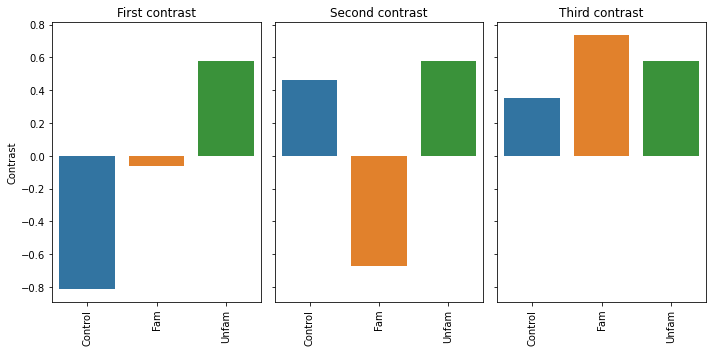

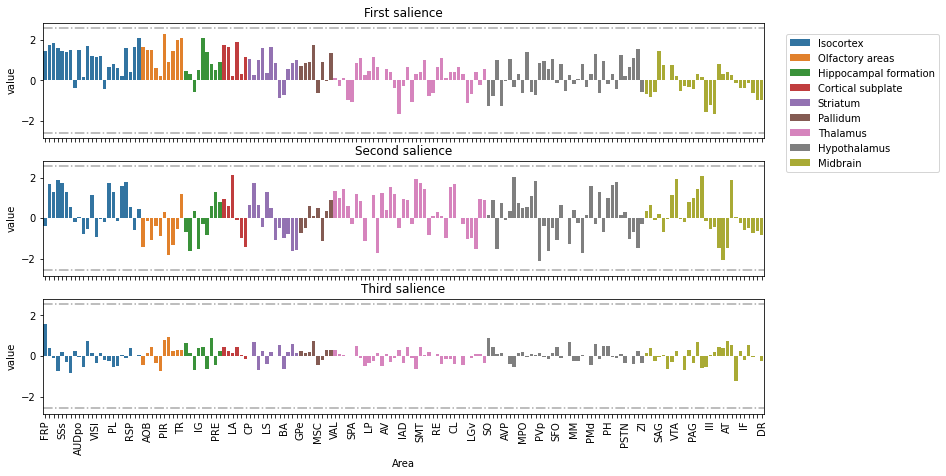

In [14]:
upls.plot_panel_contrasts(batch=batch, variable='ncells')
upls.plot_panel_saliences(batch=batch, variable='ncells', df_levels=df_levels)

# PLS energy

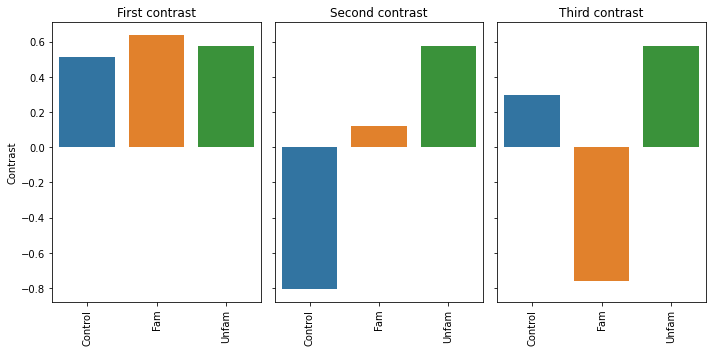

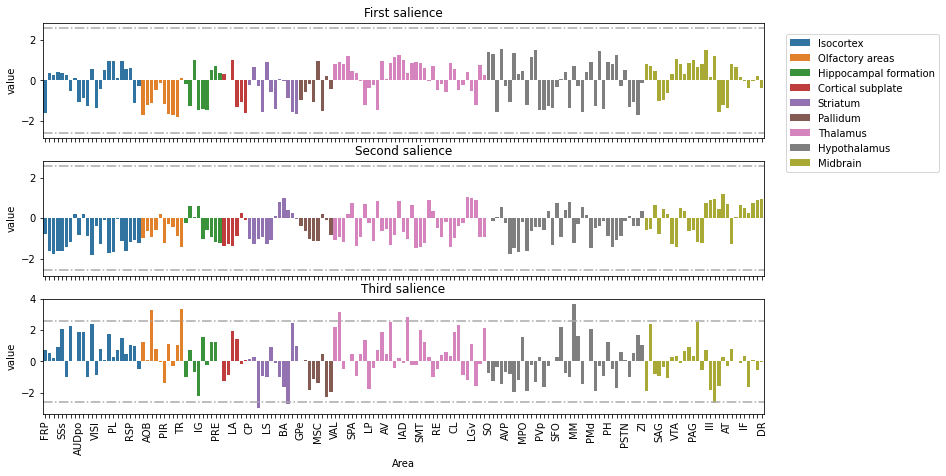

In [15]:
upls.plot_panel_contrasts(batch=batch, variable='energy')
upls.plot_panel_saliences(batch=batch, variable='energy', df_levels=df_levels)

# PLS density

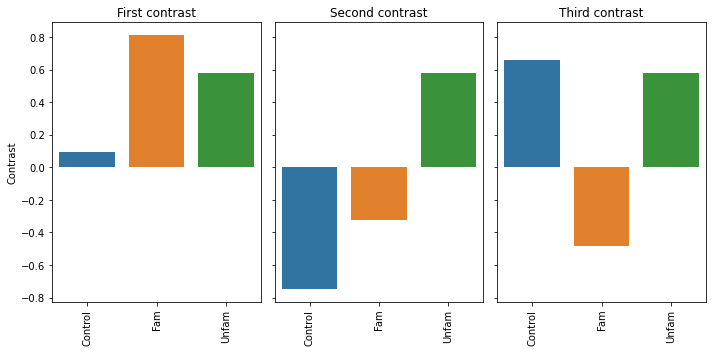

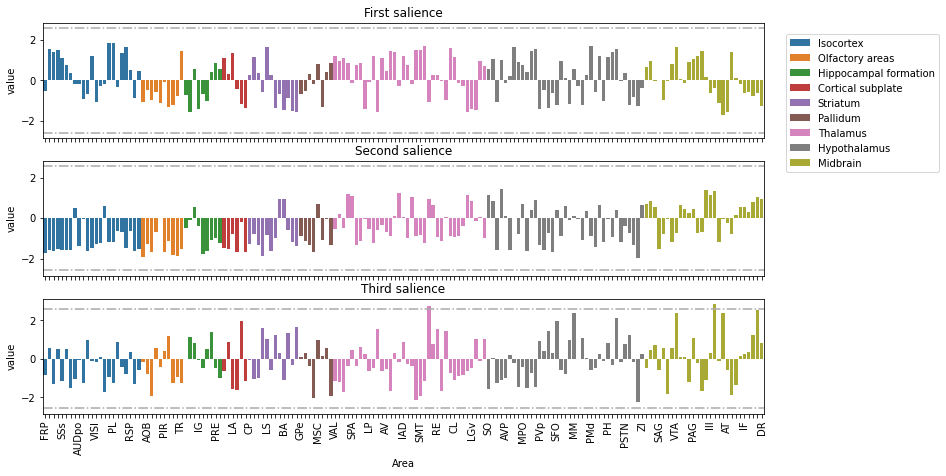

In [16]:
upls.plot_panel_contrasts(batch=batch, variable='density')
upls.plot_panel_saliences(batch=batch, variable='density', df_levels=df_levels)

# PLS relative density

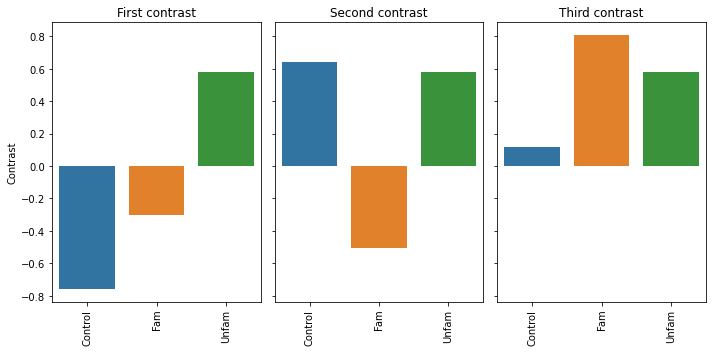

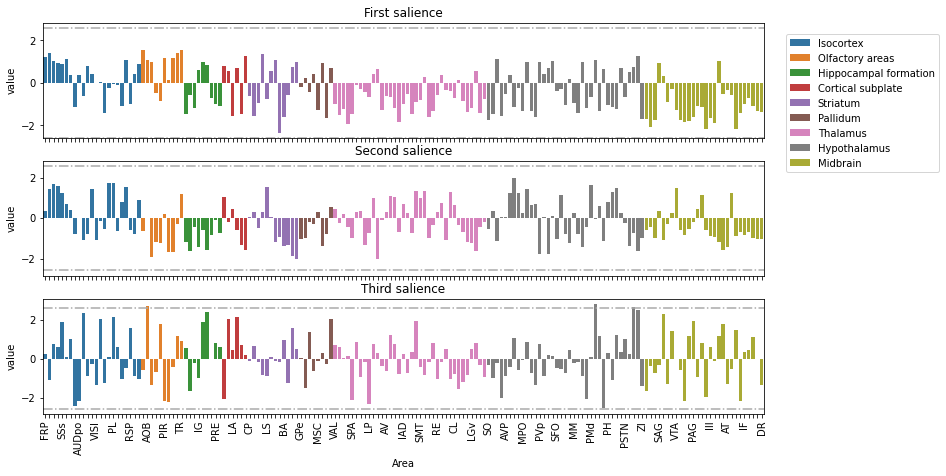

In [17]:
upls.plot_panel_contrasts(batch=batch, variable='relative_density')
upls.plot_panel_saliences(batch=batch, variable='relative_density', df_levels=df_levels)

# Identify areas with significant salience contribution

In [18]:
pls_sig_areas = upls.identify_pls_sig_areas(saliences=saliences, 
                                       threshold=1.96, 
                                       volumes=volumes)
np.save('results_pls/pls_sig_areas_WILD_without_father.npy', pls_sig_areas)

In [19]:
pls_sig_areas = np.load('results_pls/pls_sig_areas_WILD_without_father.npy', allow_pickle=True)
pls_sig_areas

array(['Agranular insular area', 'Anterior cingulate area',
       'Dorsomedial nucleus of the hypothalamus', 'Entorhinal area',
       'Interpeduncular nucleus', 'Lateral amygdalar nucleus',
       'Main olfactory bulb',
       'Periventricular hypothalamic nucleus posterior part',
       'Piriform area', 'Piriform-amygdalar area', 'Primary motor area',
       'Primary somatosensory area', 'Supplemental somatosensory area',
       'Ventral posterior complex of the thalamus',
       'Ventral tegmental nucleus'], dtype='<U51')

In [20]:
overlap = {'ncells':[], 'energy':[], 'density':[], 'relative_density':[]}
for variable in overlap.keys():
    overlap[variable] = set(upls.identify_pls_sig_areas(saliences=pd.read_csv(
        './results_pls/'+ batch +'_'+ variable +'_saliences.csv'), 
                                           threshold=1.96, 
                                           volumes=volumes))
[len(overlap[key]) for key in overlap.keys()]

[10, 24, 11, 30]

In [21]:
overlap['relative_density']

{'Accessory olfactory bulb',
 'Anterior amygdalar area',
 'Anterodorsal preoptic nucleus',
 'Basolateral amygdalar nucleus',
 'Bed nucleus of the anterior commissure',
 'Claustrum',
 'Endopiriform nucleus',
 'Inferior colliculus',
 'Lateral posterior nucleus of the thalamus',
 'Medial amygdalar nucleus',
 'Medial preoptic nucleus',
 'Midbrain reticular nucleus',
 'Nucleus of the lateral olfactory tract',
 'Parabigeminal nucleus',
 'Parasubiculum',
 'Pedunculopontine nucleus',
 'Piriform area',
 'Posterior auditory area',
 'Posterior limiting nucleus of the thalamus',
 'Prelimbic area',
 'Primary auditory area',
 'Primary visual area',
 'Red nucleus',
 'Subparafascicular area',
 'Substantia nigra compact part',
 'Subthalamic nucleus',
 'Tuberal nucleus',
 'Ventral auditory area',
 'Ventral premammillary nucleus',
 'Ventromedial hypothalamic nucleus'}

In [22]:
# union between areas significant in all analyses
all_areas = overlap['ncells'].union(overlap['energy']).union(overlap['density']).union(overlap['relative_density'])
# intersection between areas significant in all analyses
intersection = overlap['ncells'].intersection(overlap['energy']).intersection(
    overlap['density']).intersection(overlap['relative_density'])
# filtering
intersection, len(intersection)

(set(), 0)